In [34]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

In [35]:
matplotlib.rcParams['figure.figsize'] = [10.0,15.0]

### Load Viper contrast results
Top 20 regulators (10 upregulated, 10 downregulated) per contrast i.e. (Normal Vs. PC, Normal Vs. PC.adj, PC.adj Vs. PC ) 
For Gleason scores 6-9

In [36]:
all_gleason = pd.read_csv('Viper_GPL8300_non_filtered_results.txt',sep='\t',index_col=0)

In [37]:
all_gleason.head()

,Regulon,Size,NES,p.value,FDR,Ledge,ID
CREB3L1,CREB3L1,68,4.38,0.000012,0.0132,"CLDN8, GJB1, CLN3, UAP1, + 45 genes",PC.adj_PC_6
BCL9,BCL9,52,3.80,0.000144,0.0378,"LINC01138, GSTP1, RRAS, ACTL6A, + 24 genes",PC.adj_PC_6
GJB1,GJB1,104,3.20,0.001370,0.0961,"SYNGR2, HPN, PYCR1, SMPDL3B, + 69 genes",PC.adj_PC_6
ABCC2,ABCC2,38,3.14,0.001680,0.1080,"SCAI, GLYAT, TARS, WNT11, + 7 genes",PC.adj_PC_6
LRIG1,LRIG1,72,3.02,0.002550,0.1250,"CLDN8, GUSB, FLNA, RBP1, + 50 genes",PC.adj_PC_6


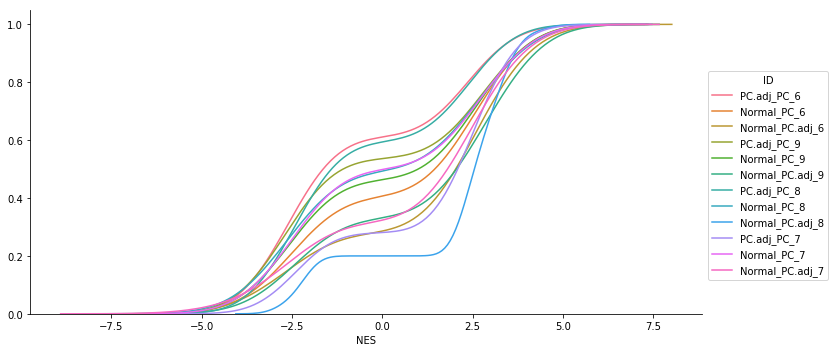

In [38]:
g = sns.FacetGrid(all_gleason, hue='ID', size= 5, aspect=2)
g = (g.map(sns.distplot, "NES", hist=False, kde_kws=dict(cumulative=True)).add_legend())

In [39]:
all_gleason.shape

(1850, 7)

Sort by ID column. Values in all_gleason.ID refer to baseline, contrast and gleason value, respectfully 
i.e. 'PC.adj_PC_8' == PC.adj & PC Gleason score 8

In [40]:
all_gleason = all_gleason.sort_values('ID')
all_gleason.head()

,Regulon,Size,NES,p.value,FDR,Ledge,ID
F2,F2,26,-2.79,0.00519,0.1670,"DOPEY1, NKX2-2, ZNF473, PGR, + 5 genes",Normal_PC.adj_6
MT2A,MT2A,38,3.08,0.00210,0.0915,"BTG2, JUNB, ZFP36, NR4A1, + 12 genes",Normal_PC.adj_6
NFKBIA,NFKBIA,42,3.07,0.00217,0.0915,"PER2, CCL5, CXCL1, PEX19, + 19 genes",Normal_PC.adj_6
CD3D,CD3D,72,3.06,0.00220,0.0915,"CXCR4, HLA-DPB1, PUF60, HLA-DPA1, + 41 genes",Normal_PC.adj_6
ANGPT1,ANGPT1,83,2.99,0.00280,0.1120,"CCT5, CCND1, PAGE4, FGFR2, + 51 genes",Normal_PC.adj_6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

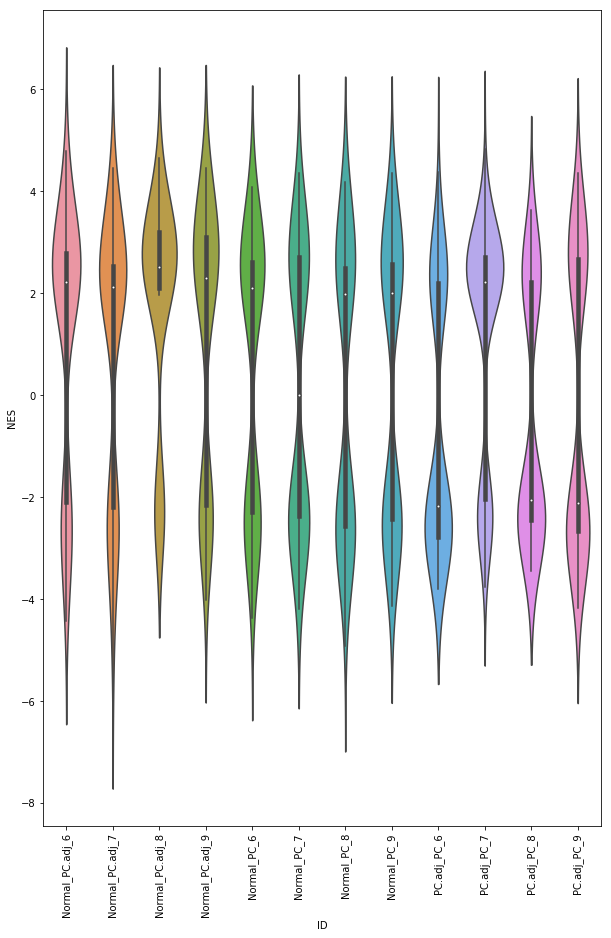

In [41]:
g = sns.violinplot(x='ID', y='NES', data = all_gleason)
plt.xticks(rotation = 90)

Text(0.5,0.98,'# of significant regulators across all comparisons')

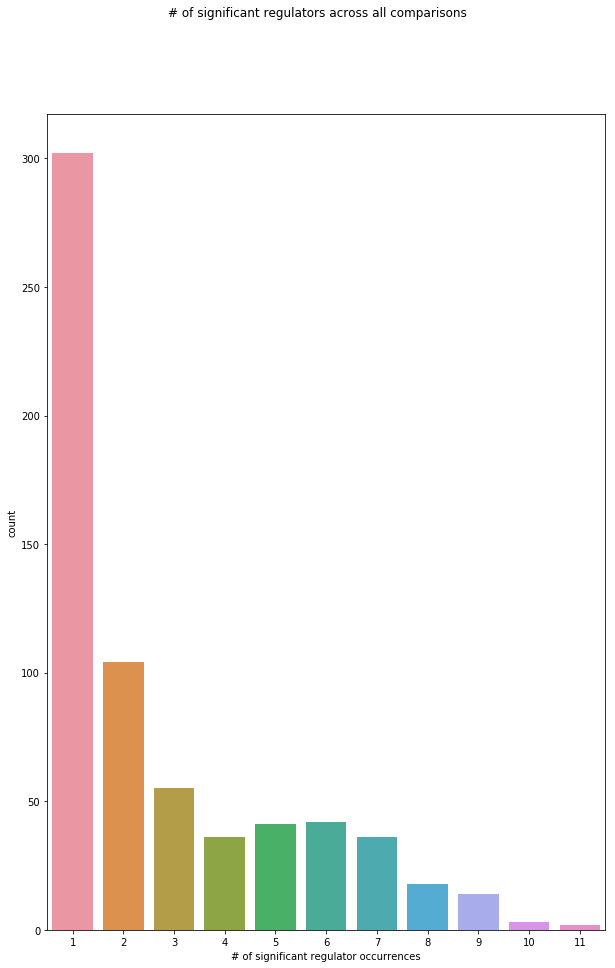

In [42]:
sns.countplot(all_gleason['Regulon'].value_counts())
plt.xlabel('# of significant regulator occurrences')
plt.suptitle('# of significant regulators across all comparisons')

In [43]:
all_gleason['Regulon'].value_counts().describe()

count    653.000000
mean       2.833078
std        2.374715
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       11.000000
Name: Regulon, dtype: float64

In [44]:
print('Top 10 targets:')
top_10_idx = all_gleason['Regulon'].value_counts()[:10].index
all_gleason['Regulon'].value_counts()[:10]


Top 10 targets:


E2F5     11
OGT      11
YBX1     10
CSK      10
AGTR1    10
FOSB      9
MEN1      9
TRAF4     9
JUND      9
NR4A1     9
Name: Regulon, dtype: int64

Count the number of occurrences a regulator appears across all gleason scores and contrast groups:

( Normal Vs. PC, Normal Vs. PC.adj, PC.adj Vs. PC)

The maximum possible count observation is 12.

In [45]:
all_gleason_nes = all_gleason.pivot(index='Regulon',columns='ID',values='NES')
all_gleason_fdr = all_gleason.pivot(index='Regulon',columns='ID',values='FDR')

In [46]:
all_gleason_nes.head()

ID,Normal_PC.adj_6,Normal_PC.adj_7,Normal_PC.adj_8,Normal_PC.adj_9,Normal_PC_6,Normal_PC_7,Normal_PC_8,Normal_PC_9,PC.adj_PC_6,PC.adj_PC_7,PC.adj_PC_8,PC.adj_PC_9
Regulon,,,,,,,,,,,,
ABCB6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.16
ABCC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.14,NaN,NaN,NaN
ABL1,NaN,-2.36,NaN,-2.01,NaN,NaN,NaN,-2.05,NaN,NaN,NaN,NaN
ACO1,NaN,NaN,NaN,NaN,-2.51,-2.83,-3.02,-3.14,NaN,-3.22,-3.10,-2.74
ACTA2,NaN,NaN,NaN,NaN,NaN,NaN,-2.97,-3.27,-2.54,NaN,-2.63,-3.67


### All targets - reorder samples based on Gleason score, reorder rows on significant NES values

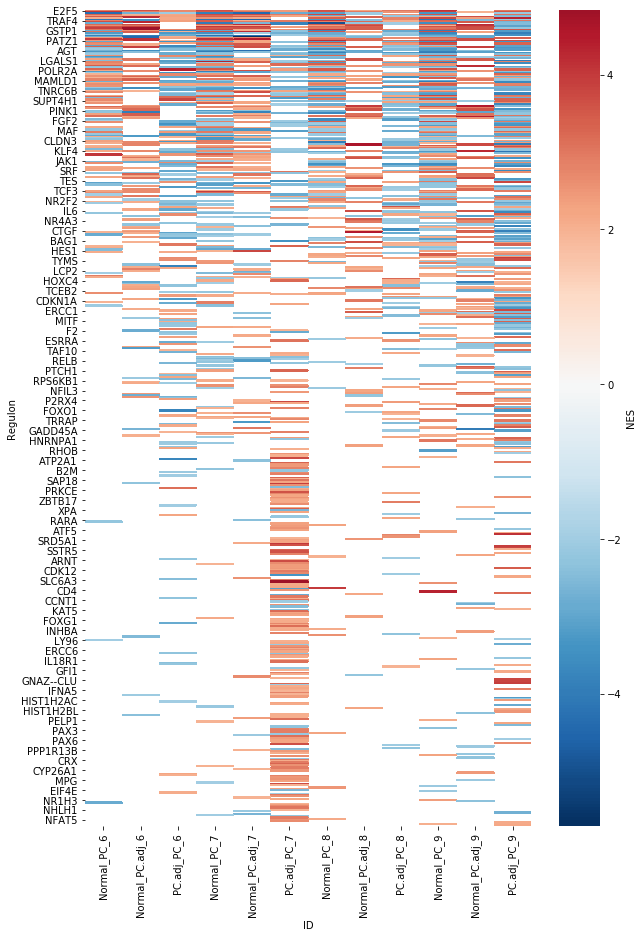

In [47]:
reorder = ['Normal_PC_6','Normal_PC.adj_6','PC.adj_PC_6','Normal_PC_7','Normal_PC.adj_7','PC.adj_PC_7','Normal_PC_8','Normal_PC.adj_8', 'PC.adj_PC_8','Normal_PC_9','Normal_PC.adj_9', 'PC.adj_PC_9']
all_gleason_nes_reorder = all_gleason_nes[reorder]
all_gleason_fdr_reorder = all_gleason_fdr[reorder]
ordered_idx = all_gleason_nes_reorder.isnull().sum(axis=1).sort_values().index
all_gleason_nes_reorder = all_gleason_nes_reorder.reindex(ordered_idx)
all_gleason_fdr_reorder = all_gleason_fdr_reorder.reindex(ordered_idx)
mask = np.isnan(all_gleason_nes_reorder)
sns.heatmap(all_gleason_nes_reorder, mask=mask, center = 0.0,cmap='RdBu_r',cbar_kws={'label':'NES'})

### Lets look at targets significantly expressed across all comparisons 

#### Evaluate top 10 targets

Text(0.5,0.98,'Annotated with FDR')

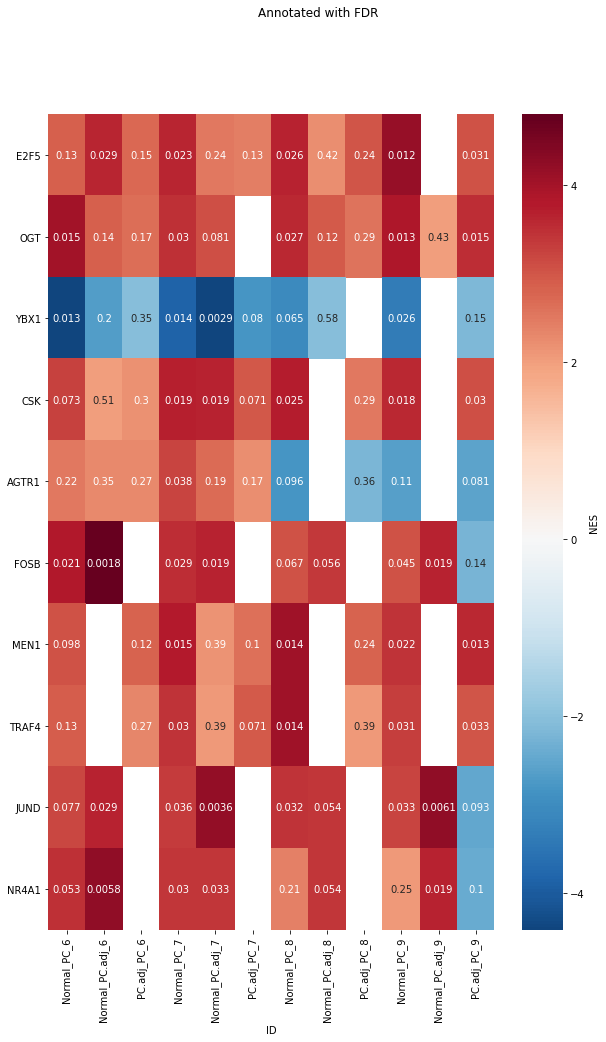

In [48]:
top_mask = np.isnan(all_gleason_nes_reorder.loc[top_10_idx,:])
fdr_values = all_gleason_fdr_reorder.loc[top_10_idx,:]
g = sns.heatmap(all_gleason_nes_reorder.loc[top_10_idx,:], mask=top_mask, center = 0.0,cmap='RdBu_r',annot=fdr_values,cbar_kws={'label':'NES'})
plt.yticks(rotation=0)
plt.suptitle('Annotated with FDR')

In [49]:
fdr_values.describe()

ID,Normal_PC_6,Normal_PC.adj_6,PC.adj_PC_6,Normal_PC_7,Normal_PC.adj_7,PC.adj_PC_7,Normal_PC_8,Normal_PC.adj_8,PC.adj_PC_8,Normal_PC_9,Normal_PC.adj_9,PC.adj_PC_9
count,10.000000,8.000000,7.000000,10.000000,10.000000,6.000000,10.000000,6.00000,6.000000,10.000000,4.000000,10.000000
mean,0.082530,0.158941,0.234000,0.026510,0.137379,0.105467,0.057580,0.21485,0.303833,0.055920,0.119225,0.069540
std,0.063689,0.186205,0.085116,0.008135,0.157453,0.040393,0.059862,0.22954,0.061196,0.073030,0.209270,0.052673
min,0.013100,0.001750,0.125000,0.014200,0.002940,0.071300,0.014200,0.05390,0.242000,0.012300,0.006100,0.013500
25%,0.029100,0.023195,0.161000,0.020275,0.018800,0.073525,0.025375,0.05450,0.255000,0.019400,0.015700,0.030200
50%,0.075300,0.087000,0.268000,0.029650,0.056850,0.092600,0.029500,0.08815,0.294000,0.028400,0.018900,0.056700
75%,0.121300,0.238750,0.285000,0.030100,0.227500,0.126000,0.066100,0.34875,0.342000,0.042425,0.122425,0.098375
max,0.216000,0.506000,0.353000,0.037800,0.394000,0.172000,0.210000,0.58000,0.393000,0.247000,0.433000,0.155000


In [50]:
idx = all_gleason_nes.isnull().sum(axis=1).sort_values()
filt_idx = idx <= 9
filt_idx = filt_idx.loc[filt_idx].index

### Ordered by tissue comparison

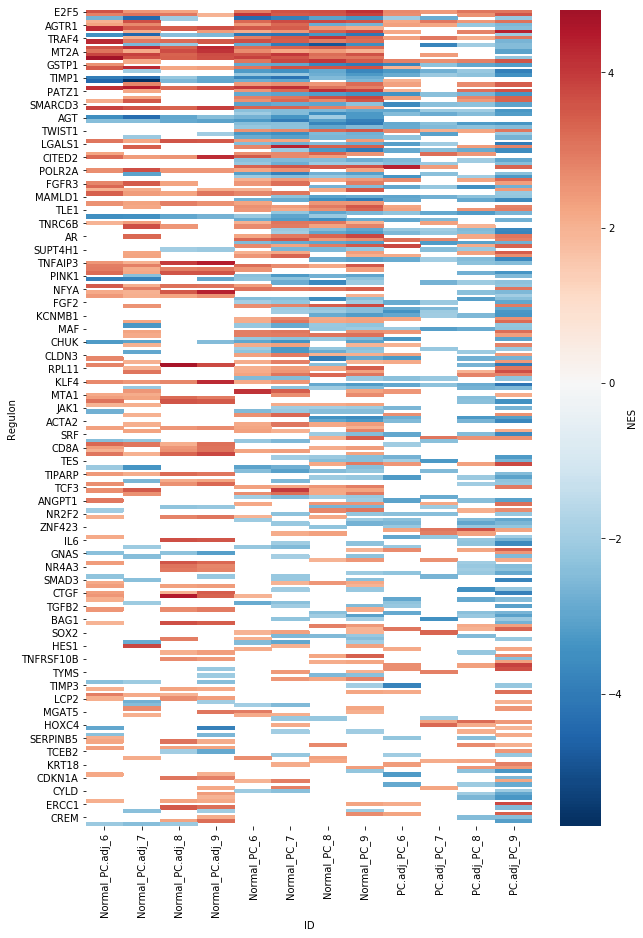

In [51]:
all_gleason_nes_filt = all_gleason_nes.reindex(filt_idx)
mask = np.isnan(all_gleason_nes_filt)
sns.heatmap(all_gleason_nes_filt, mask=mask,center = 0.0, cmap='RdBu_r', cbar_kws={'label':'NES'})

### Evaluate unsupervised NES clustering

In [52]:
mask = np.isnan(all_gleason_nes)

Text(0.5,0.98,'Without column clustering')

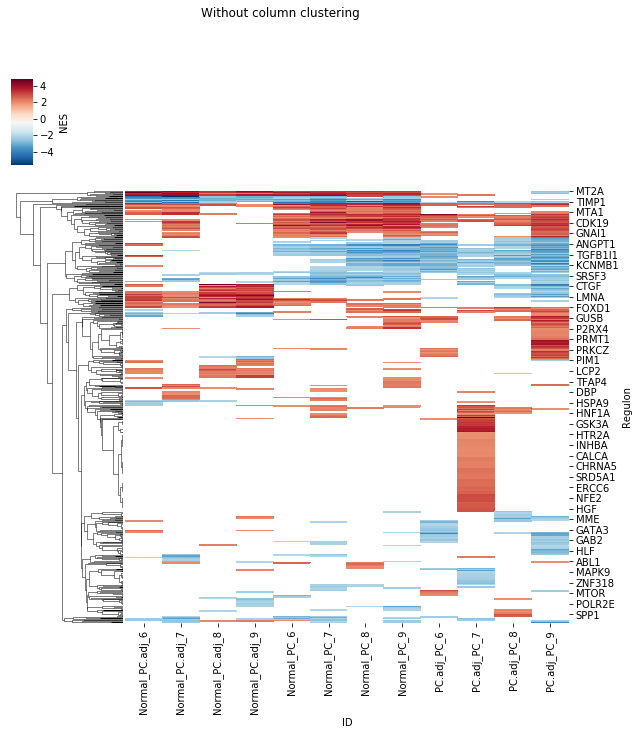

In [53]:
sns.clustermap(all_gleason_nes.fillna(0.0),mask=mask,cmap='RdBu_r',col_cluster=False,cbar_kws={'label':'NES'})
plt.suptitle('Without column clustering')

Text(0.5,0.98,'With column clustering')

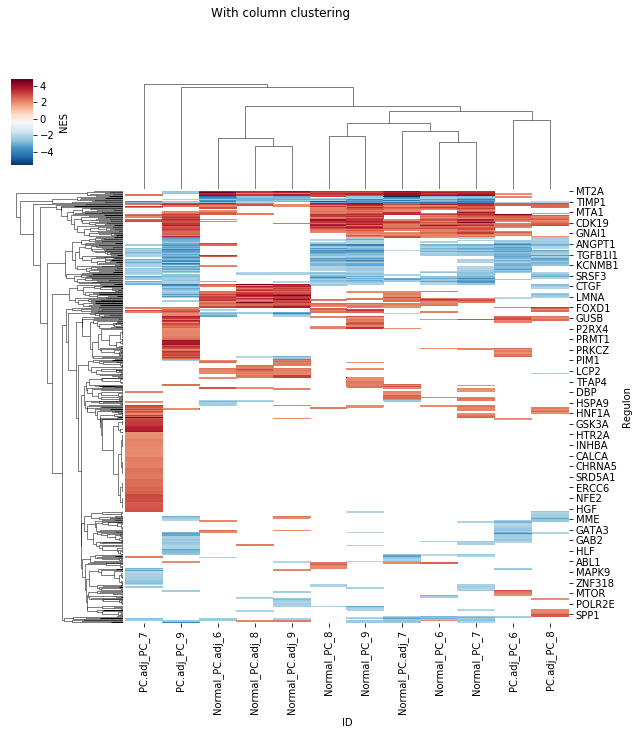

In [54]:
sns.clustermap(all_gleason_nes.fillna(0.0),mask=mask,cmap='RdBu_r',cbar_kws={'label':'NES'})
plt.suptitle('With column clustering')

### Evaluate Normal Vs. Adjacent Tissue results.

In [55]:
adjacent_tissues = ['Normal_PC.adj_6','Normal_PC.adj_7','Normal_PC.adj_8', 'Normal_PC.adj_9']

In [56]:
adjacent_contrast = all_gleason.loc[all_gleason['ID'].isin(adjacent_tissues),:]

In [57]:
adjacent_contrast.shape

(426, 7)

In [58]:
adjacent_contrast.describe()

,Size,NES,p.value,FDR
count,426.000000,426.000000,4.260000e+02,426.000000
mean,56.969484,1.194272,1.603578e-02,0.239658
std,26.464565,2.533611,1.489955e-02,0.166177
min,25.000000,-5.700000,1.200000e-08,0.000013
25%,38.000000,-2.090000,1.897500e-03,0.068800
50%,50.000000,2.255000,1.175000e-02,0.252500
75%,70.000000,2.952500,2.807500e-02,0.394000
max,179.000000,4.800000,4.910000e-02,0.650000


In [59]:
adjacent_contrast.head()

,Regulon,Size,NES,p.value,FDR,Ledge,ID
F2,F2,26,-2.79,0.00519,0.1670,"DOPEY1, NKX2-2, ZNF473, PGR, + 5 genes",Normal_PC.adj_6
MT2A,MT2A,38,3.08,0.00210,0.0915,"BTG2, JUNB, ZFP36, NR4A1, + 12 genes",Normal_PC.adj_6
NFKBIA,NFKBIA,42,3.07,0.00217,0.0915,"PER2, CCL5, CXCL1, PEX19, + 19 genes",Normal_PC.adj_6
CD3D,CD3D,72,3.06,0.00220,0.0915,"CXCR4, HLA-DPB1, PUF60, HLA-DPA1, + 41 genes",Normal_PC.adj_6
ANGPT1,ANGPT1,83,2.99,0.00280,0.1120,"CCT5, CCND1, PAGE4, FGFR2, + 51 genes",Normal_PC.adj_6


In [60]:
adjacent_nes = adjacent_contrast.pivot(index='Regulon',columns='ID',values='NES')

In [61]:
idx = adjacent_nes.isnull().sum(axis=1).sort_values().index
adjacent_nes = adjacent_nes.reindex(idx)

In [62]:
adjacent_nes.head()

ID,Normal_PC.adj_6,Normal_PC.adj_7,Normal_PC.adj_8,Normal_PC.adj_9
Regulon,,,,
JUNB,4.30,2.97,3.21,3.49
CXCR4,2.93,2.12,2.90,2.97
LDHA,-3.52,-3.44,-2.98,-2.68
CD3D,3.06,2.18,3.59,3.51
MT2A,3.08,2.17,3.73,4.11


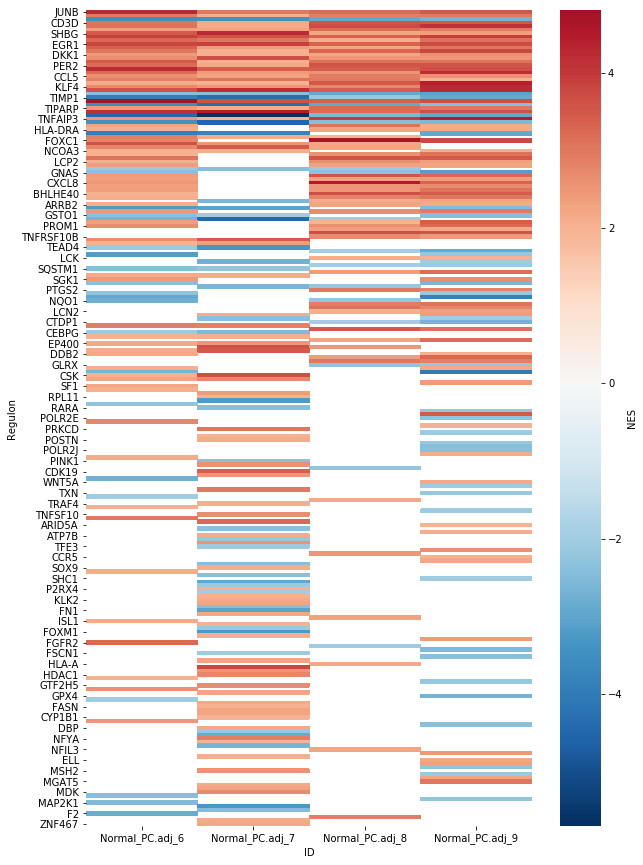

In [63]:
mask = np.isnan(adjacent_nes)
sns.heatmap(adjacent_nes, mask=mask, center = 0.0, cmap='RdBu_r',cbar_kws={'label':'NES'})

Text(0.5,0.98,'Without column clustering')

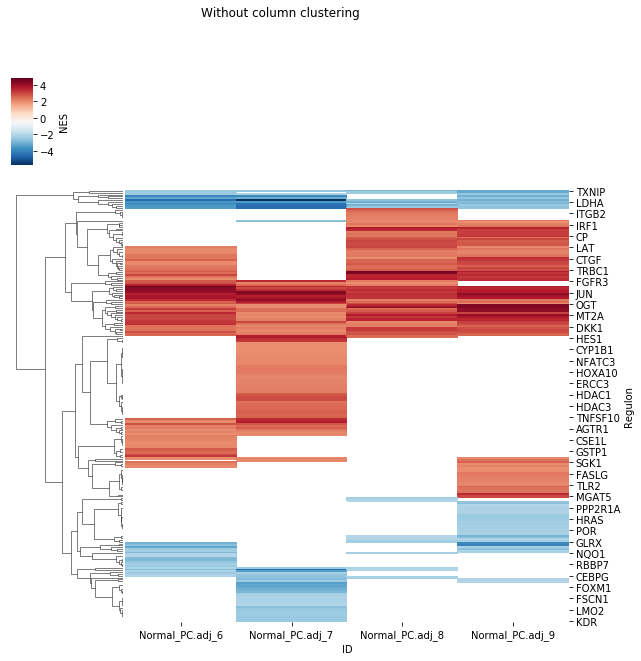

In [64]:
sns.clustermap(adjacent_nes.fillna(0.0),mask=mask,cmap='RdBu_r',col_cluster=False,cbar_kws={'label':'NES'})
plt.suptitle('Without column clustering')

### Evaluate top regulated targets in adjacent tissue and PC

In [65]:
adj_idx=adjacent_nes.iloc[:23,:].index

Text(0.5,0.98,'Without column clustering')

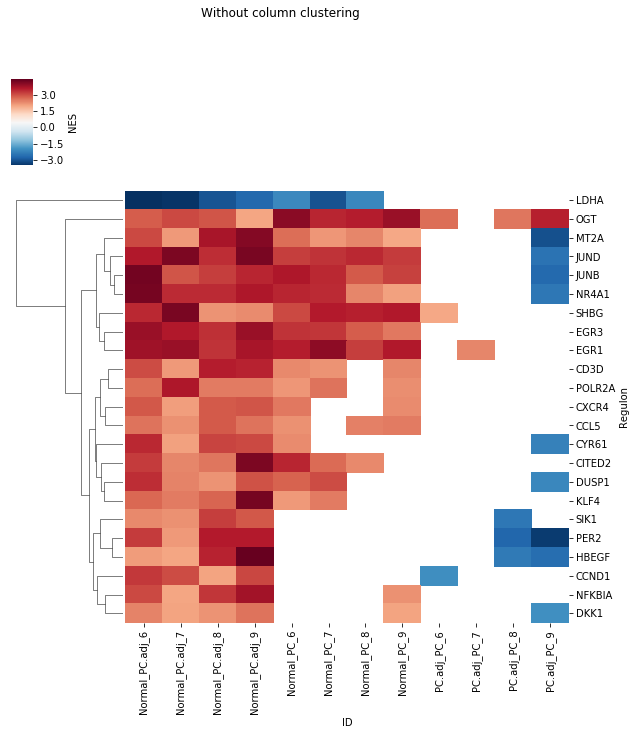

In [66]:
mask = np.isnan(all_gleason_nes.loc[adj_idx,:])
sns.clustermap(all_gleason_nes.loc[adj_idx,:].fillna(0.0), mask=mask, cmap='RdBu_r', col_cluster=False, cbar_kws = {'label':'NES'})
plt.suptitle('Without column clustering')